# Zillow Challenge: Exploratory Data Analysis
### Heath Mills

## Table of Contents

1. [Data Dictionary](#Data-Dictionary)
2. [Loading Data](#Loading-Data)
   - [An Early Challenge](#An-Early-Challenge)
   - [Viewing the Data](#Viewing-the-Data)
3. [Cleaning the Data](#Cleaning-the-Data)
   - [Changing the Names of Headers](#Renaming-Headers)
   - [Dealing with Object Type Features](#Dealing-with-Object-Type-Features)
   - [Combining Redundant Variables](#Combining-Redundant-Variables)
   - [Missing Values](#Missing-Values)
   - [Combine Data](#Combine-Data)
4. [Visualizing the Data](#Visualizing-the-Data)
   - [Sales over Time](#Sales-Over-Time)
   - [Viewing the logerror](#Viewing-the-Logerror)
   - [Geographic Variables](#Geographic-Variables)
5. [Filling NaN Data](#Filling-NaN-Data)
6. [Final Preprocessing Steps](#Final-Preprocessing-Steps)

## Data Dictionary
All of the feature names are described in a separate file, [zillow_data_dictionary.xlsx](input/zillow_data_dictionary.xlsx). I have included the main data dictionary in the first two columns of the table below. There are a number of additional tables in the other tabs of the Excel file that I will tackle later in the data cleaning process.

In addition, I found that the feature names were confusing in their current form and wanted to change these values to make the data easier for me to use. In order to do this, I added a created a csv file with both the old and new headers and then imported my new file names into the dataframes (see [Data Loading - New Headers](#Renaming-Headers)).

#### Data Dictionary (Main)
 | Feature | Description | New_Feature | 
 | -- | --| -- | 
 | 'airconditioningtypeid' |  Type of cooling system present in the home (if any) | 'type_air_cond' | 
 | 'architecturalstyletypeid' |  Architectural style of the home (i.e. ranch, colonial, split-level, etc…) | 'type_arch_style' | 
 | 'basementsqft' |  Finished living area below or partially below ground level | 'sqft_basement' | 
 | 'bathroomcnt' |  Number of bathrooms in home including fractional bathrooms | 'count_total_bath' | 
 | 'bedroomcnt' |  Number of bedrooms in home  | 'count_total_bed' | 
 | 'buildingqualitytypeid' |  Overall assessment of condition of the building from best (lowest) to worst (highest) | 'type_building_quality' | 
 | 'buildingclasstypeid' | The building framing type (steel frame, wood frame, concrete/brick)  | 'type_building_frame' | 
 | 'calculatedbathnbr' |  Number of bathrooms in home including fractional bathroom | 'count_total_bath2' | 
 | 'decktypeid' | Type of deck (if any) present on parcel | 'type_deck' | 
 | 'threequarterbathnbr' |  Number of 3/4 bathrooms in house (shower + sink + toilet) | 'count_3/4_bath' | 
 | 'finishedfloor1squarefeet' |  Size of the finished living area on the first (entry) floor of the home | 'sqft_first_floor' | 
 | 'calculatedfinishedsquarefeet' |  Calculated total finished living area of the home  | 'sqft_total_finished' | 
 | 'finishedsquarefeet6' | Base unfinished and finished area | 'sqft_total_all' | 
 | 'finishedsquarefeet12' | Finished living area | 'sqft_living_finished' | 
 | 'finishedsquarefeet13' | Perimeter  living area | 'sqft_living_perimeter' | 
 | 'finishedsquarefeet15' | Total area | 'sqft_total_area' | 
 | 'finishedsquarefeet50' |  Size of the finished living area on the first (entry) floor of the home | 'sqft_first_floor_finished' | 
 | 'fips' |  Federal Information Processing Standard code -  see https://en.wikipedia.org/wiki/FIPS_county_code for more details | 'loc_county_fips' | 
 | 'fireplacecnt' |  Number of fireplaces in a home (if any) | 'count_fireplace' | 
 | 'fireplaceflag' |  Is a fireplace present in this home  | 'flag_fireplace' | 
 | 'fullbathcnt' |  Number of full bathrooms (sink, shower + bathtub, and toilet) present in home | 'count_full_bath' | 
 | 'garagecarcnt' |  Total number of garages on the lot including an attached garage | 'count_garage' | 
 | 'garagetotalsqft' |  Total number of square feet of all garages on lot including an attached garage | 'sqft_garage' | 
 | 'hashottuborspa' |  Does the home have a hot tub or spa | 'flag_hot_tub_spa' | 
 | 'heatingorsystemtypeid' |  Type of home heating system | 'type_heating' | 
 | 'latitude' |  Latitude of the middle of the parcel multiplied by 10e6 | 'loc_latitude' | 
 | 'longitude' |  Longitude of the middle of the parcel multiplied by 10e6 | 'loc_longitude' | 
 | 'lotsizesquarefeet' |  Area of the lot in square feet | 'sqft_total_lot' | 
 | 'numberofstories' |  Number of stories or levels the home has | 'count_home_stories' | 
 | 'parcelid' |  Unique identifier for parcels (lots)  | 'ParcelId' | 
 | 'poolcnt' |  Number of pools on the lot (if any) | 'count_pools' | 
 | 'poolsizesum' |  Total square footage of all pools on property | 'sqft_pools' | 
 | 'pooltypeid10' |  Spa or Hot Tub | 'flag_hot_tub_spa2' | 
 | 'pooltypeid2' |  Pool with Spa/Hot Tub | 'flag_pool+hot_tub_spa' | 
 | 'pooltypeid7' |  Pool without hot tub | 'flag_pool+hot_tub_spa' | 
 | 'propertycountylandusecode' |  County land use code i.e. it's zoning at the county level | 'type_county_zoning' | 
 | 'propertylandusetypeid' |  Type of land use the property is zoned for | 'type_landuse_zoning' | 
 | 'propertyzoningdesc' |  Description of the allowed land uses (zoning) for that property | 'text_zoning' | 
 | 'rawcensustractandblock' |  Census tract and block ID combined - also contains blockgroup assignment by extension | 'id_censustract_and_blockid_raw' | 
 | 'censustractandblock' |  Census tract and block ID combined - also contains blockgroup assignment by extension | 'id_censustract_and_blockid' | 
 | 'regionidcounty' | County in which the property is located | 'loc_county_id' | 
 | 'regionidcity' |  City in which the property is located (if any) | 'loc_city_id' | 
 | 'regionidzip' |  Zip code in which the property is located | 'loc_zipcode' | 
 | 'regionidneighborhood' | Neighborhood in which the property is located | 'loc_neighborhood_id' | 
 | 'roomcnt' |  Total number of rooms in the principal residence | 'count_total_room' | 
 | 'storytypeid' |  Type of floors in a multi-story house (i.e. basement and main level, split-level, attic, etc.).  See tab for details. | 'type_home_stories' | 
 | 'typeconstructiontypeid' |  What type of construction material was used to construct the home | 'type_building_material' | 
 | 'unitcnt' |  Number of units the structure is built into (i.e. 2 = duplex, 3 = triplex, etc...) | 'count_units_in_structure' | 
 | 'yardbuildingsqft17' | Patio in  yard | 'flag_patio' | 
 | 'yardbuildingsqft26' | Storage shed/building in yard | 'flag_storage_shed' | 
 | 'yearbuilt' |  The Year the principal residence was built  | 'date_year_built' | 
 | 'taxvaluedollarcnt' | The total tax assessed value of the parcel | 'value_tax_total' | 
 | 'structuretaxvaluedollarcnt' | The assessed value of the built structure on the parcel | 'value_tax_building' | 
 | 'landtaxvaluedollarcnt' | The assessed value of the land area of the parcel | 'value_tax_lot' | 
 | 'taxamount' | The total property tax assessed for that assessment year | 'cost_tax_paid' | 
 | 'assessmentyear' | The year of the property tax assessment  | 'date_year_of_tax' | 
 | 'taxdelinquencyflag' | Property taxes for this parcel are past due as of 2015 | 'flag_tax_owed_2015' | 
 | 'taxdelinquencyyear' | Year for which the unpaid propert taxes were due  | 'data_tax_owed' | 

## Loading Data

In [1]:
#Import Libraries/Packages For Use
import numpy as np 
import pandas as pd
import datetime as dt 
import os
import seaborn as sns
import matplotlib.pyplot as plt
import ggplot as ggplot
from ggplot import * 
color = sns.color_palette()
import folium

plt.style.use('fivethirtyeight')
%matplotlib inline

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

/anaconda/lib/python2.7/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/anaconda/lib/python2.7/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### An Early Challenge

When I first loaded the imported data, I ran into my first issue. One of the sets of data that I was loading into a dataframe, train_2016_v2.csv, was burning through a lot of memory. In addition, I got the following error:
>/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)

I realized that this memory issue was set to increase upon the addition of the 2017 data, so I searched the message boards on Kaggle for help with the issue. Eventually, I discovered two entries: [Faster data loading time in Python](https://www.kaggle.com/c/zillow-prize-1/discussion/37261) and [Reducing DataFrame memory size by ~65%](https://www.kaggle.com/arjanso/reducing-dataframe-memory-size-by-65). I originally incorporated both of these ideas into my code before realizing I should use my data cleaning steps for the dataframe memory reduction.

The pickled files do speed up the data loading time significantly, which was great for working with such a large data set a couple of hours a day over a number of days.

In [2]:
def load_data():
    # Pickled versions of Data Sets
    train2016_p = './pickled/train2016_p'
    train2017_p = './pickled/train2017_p'
    prop2016_p = './pickled/prop2016_p'
    prop2017_p = './pickled/prop2017_p'
    sample_p = './pickled/sample_p'

    # If pickled train2016 exists, load it; else load train_2016_v2.csv to df and pickle it
    if os.path.exists(train2016_p):
        train2016 = pd.read_pickle(train2016_p)
    else:
        # load data to df
        train2016 = pd.read_csv('./input/train_2016_v2.csv',
                            parse_dates=['transactiondate'])
        # create pickled file for storage
        train2016.to_pickle(train2016_p)

    # If pickled train2017 exists, load it; else load train_2017.csv to df and pickle it
    if os.path.exists(train2017_p):
        train2017 = pd.read_pickle(train2017_p)
    else:
        # load data to df
        train2017 = pd.read_csv('./input/train_2017.csv',
                            parse_dates=['transactiondate'])
        # create pickled file for storage
        train2017.to_pickle(train2017_p)

    # If pickled prop2016_p load it; else load properties_2016.csv to df and pickle it
    if os.path.exists(prop2016_p):
        prop2016 = pd.read_pickle(prop2016_p)
    else:
        prop2016 = pd.read_csv('./input/properties_2016.csv')
        prop2016.to_pickle(prop2016_p)

    # If pickled prop2017_p load it; else load properties_2017.csv to df and pickle it
    if os.path.exists(prop2017_p):
        prop2017 = pd.read_pickle(prop2017_p)
    else:
        prop2017 = pd.read_csv('./input/properties_2017.csv')
        prop2017.to_pickle(prop2017_p)

    # If pickled sample exists, load it; else load sample_submission.csv to df and pickle it
    if os.path.exists(sample_p):
        sample = pd.read_pickle(sample_p)
    else:
        sample = pd.read_csv('./input/sample_submission.csv')
        sample.to_pickle(sample_p)
    return prop2016, prop2017, train2016, train2017, sample

In [3]:
#Load Datasets
prop2016, prop2017, train2016, train2017, sample = load_data()

### Viewing the Data

#### Shape of Dataframes

In [4]:
print('-----Prop2016-----')
print('Number of Properties: '+str(prop2016.shape[0]))
print('Number of Features/Property: '+str(prop2016.shape[1]))
print('-----Prop2017-----')
print('Number of Properties: '+str(prop2017.shape[0]))
print('Number of Features/Property: '+str(prop2017.shape[1]))
print('-----Train2016-----')
print('Number of Properties: '+str(train2016.shape[0]))
print('Number of Features/Property: '+str(train2016.shape[1]))
print('-----Train2017-----')
print('Number of Properties: '+str(train2017.shape[0]))
print('Number of Features/Property: '+str(train2017.shape[1]))
print('-----Sample-----')
print('Number of Properties: '+str(sample.shape[0]))
print('Number of Features/Property: '+str(sample.shape[1]))

-----Prop2016-----
Number of Properties: 2985217
Number of Features/Property: 58
-----Prop2017-----
Number of Properties: 2985217
Number of Features/Property: 58
-----Train2016-----
Number of Properties: 90275
Number of Features/Property: 3
-----Train2017-----
Number of Properties: 77613
Number of Features/Property: 3
-----Sample-----
Number of Properties: 2985217
Number of Features/Property: 7


##### Summary of Data

In [5]:
#Prop2016
prop2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985217 entries, 0 to 2985216
Data columns (total 58 columns):
parcelid                        int64
airconditioningtypeid           float64
architecturalstyletypeid        float64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingclasstypeid             float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                            float64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottub

In [6]:
#Prop2017
prop2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985217 entries, 0 to 2985216
Data columns (total 58 columns):
parcelid                        int64
airconditioningtypeid           float64
architecturalstyletypeid        float64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingclasstypeid             float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                            float64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottub

In [7]:
#Train2016
train2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90275 entries, 0 to 90274
Data columns (total 3 columns):
parcelid           90275 non-null int64
logerror           90275 non-null float64
transactiondate    90275 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 2.1 MB


In [8]:
#Train2017
train2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77613 entries, 0 to 77612
Data columns (total 3 columns):
parcelid           77613 non-null int64
logerror           77613 non-null float64
transactiondate    77613 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 1.8 MB


In [9]:
#Sample
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985217 entries, 0 to 2985216
Data columns (total 7 columns):
ParcelId    int64
201610      int64
201611      int64
201612      int64
201710      int64
201711      int64
201712      int64
dtypes: int64(7)
memory usage: 159.4 MB


In [10]:
# Increase number of columns visible in pandas
pd.set_option('display.max_columns', 60)

# View description of all fields in prop2016
prop2016.describe(include='all')

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
count,2.985217e+06,811519.000000,6061.000000,1628.000000,2.973755e+06,2.973767e+06,12629.000000,1.938488e+06,2.856305e+06,17096.0,202717.000000,2.929652e+06,2.709184e+06,7672.000000,190798.000000,202717.000000,22001.000000,2.973780e+06,312637.000000,2.856305e+06,883267.000000,883267.000000,69014,1.806401e+06,2.973780e+06,2.973780e+06,2.709118e+06,517534.0,27960.000000,36939.0,32075.0,485459.0,2972940,2.973780e+06,1978629,2.973780e+06,2.922372e+06,2.973780e+06,1.156402e+06,2.971237e+06,2.973742e+06,1624.0,311631.000000,6747.000000,1.977490e+06,80355.000000,2647.000000,2.925289e+06,682069.000000,5163,2.930235e+06,2.942667e+06,2.973778e+06,2.917484e+06,2.953967e+06,56462,56464.000000,2.910091e+06
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,240,NaN,5638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0100,NaN,LAR1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1153896,NaN,275029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5163,NaN,NaN,NaN,NaN,NaN,56462,NaN,NaN
mean,1.332586e+07,1.931166,7.202607,646.883292,2.209143e+00,3.088949e+00,3.725948,5.784787e+00,2.299263e+00,66.0,1380.630396,1.827162e+03,1.760001e+03,1178.900678,2739.187235,1388.944578,2414.339439,6.048032e+03,1.168710,2.244165e+00,1.823517,383.769357,NaN,4.012053e+00,3.400147e+07,-1.182019e+08,2.282281e+04,1.0,519.710980,1.0,1.0,1.0,NaN,2.600484e+02,NaN,6.048345e+07,3.499335e+04,2.570461e+03,1.934764e+05,9.655267e+04,1.475018e+00,7.0,1.010009,5.999555,1.181171e+00,319.803397,278.296562,1.964262e+03,1.401464,NaN,1.708836e+05,4.204790e+05,2.014999e+03,2.524780e+05,5.377607e+03,NaN,13.892409,6.048431e+13
std,7.909966e+06,3.148587,2.436290,538.793473,1.077754e+00,1.275859e+00,0.501700,1.805352e+00,1.000736e+00,0.0,632.868543,1.819780e+03,9.710610e+02,357.073036,5447.428327,664.488709,7695.302952,2.023278e+01,0.461273,9.912054e-01,0.610035,245.443419,NaN,3.293733e+00,2.433812e+05,3.453171e+05,3.375924e+05,0.0,191.323284,0.0,0.0,0.0,NaN,1.590817e+01,NaN,2.008117e+05,5.072747e+04,7.880711e+02,1.657133e+05,3.673175e+03,2.840403e+00,0.0,0.117709,0.384050,2.447896e+00,233.086314,369.731508,2.344132e+01,0.539076,NaN,4.020683e+05,7.263467e+05,3.683161e-02,4.450132e+05,9.183107e+03,NaN,2.581006,3.249035e+11
min,1.071172e+07,1.000000,2.000000,20.000000,0.000000e+00,0.000000e+00,1.000000,1.000000e+00,1.000000e+00,66.0,3.000000,1.000000e+00,1.000000e+00,120.000000,112.000000,3.000000,117.000000,6.037000e+03,1.000000,1.000000e+00,0.000000,0.000000,NaN,1.000000e+00,3.332439e+07,-1.194758e+08,1.000000e+02,1.0,19.000000,1.0,1.0,1.0,NaN,3.100000e+01,NaN,6.037101e+07,3.491000e+03,1.286000e+03,6.952000e+03,

In [11]:
#View description of all fields in prop2017
prop2017.describe(include='all')

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
count,2.985217e+06,815362.000000,6061.000000,1627.000000,2.982260e+06,2.982272e+06,12731.000000,1.941395e+06,2.868061e+06,17379.0,203758.000000,2.940120e+06,2.720786e+06,7671.000000,190185.000000,203758.000000,21482.000000,2.982285e+06,313124.000000,2.868061e+06,891008.000000,891008.00000,50062,1.869164e+06,2.982285e+06,2.982285e+06,2.712511e+06,539632.0,27958.000000,17006.0,33056.0,505895.0,2982218,2.982285e+06,1982471,2.982285e+06,2.923089e+06,2.982285e+06,1.156741e+06,2.972503e+06,2.982248e+06,1623.0,316357.000000,6746.000000,1.981042e+06,81588.000000,2646.000000,2.937384e+06,685676.000000,5163,2.938753e+06,2.950951e+06,2.982284e+06,2.925291e+06,2.962465e+06,56515,56517.000000,2.910232e+06
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,234,NaN,5651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0100,NaN,LAR1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1153332,NaN,275246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5163,NaN,NaN,NaN,NaN,NaN,56515,NaN,NaN
mean,1.332586e+07,1.945723,7.202607,647.220652,2.216196e+00,3.093362e+00,3.734742,6.280822e+00,2.303826e+00,66.0,1379.780460,1.831455e+03,1.764045e+03,1178.916699,2754.869233,1392.029093,2427.555209,6.048053e+03,1.168959,2.248089e+00,1.826581,383.15622,NaN,4.083750e+00,3.400131e+07,-1.182017e+08,2.260376e+04,1.0,519.715430,1.0,1.0,1.0,NaN,2.600508e+02,NaN,6.048367e+07,3.498766e+04,2.569085e+03,1.935387e+05,9.655329e+04,1.474357e+00,7.0,1.010611,5.999555,1.180303e+00,321.541612,278.365457,1.964438e+03,1.400956,NaN,1.781429e+05,4.435279e+05,2.015998e+03,2.684558e+05,5.408949e+03,NaN,13.891696,6.048434e+13
std,7.909966e+06,3.160507,2.436290,538.787104,1.078250e+00,1.271569e+00,0.500371,1.729923e+00,1.003243e+00,0.0,634.422849,1.954198e+03,1.031383e+03,357.093554,5999.380115,682.323851,7786.185183,2.024082e+01,0.461855,9.929959e-01,0.608934,246.21942,NaN,3.286780e+00,2.435157e+05,3.455918e+05,2.499836e+05,0.0,191.325869,0.0,0.0,0.0,NaN,1.593121e+01,NaN,2.008914e+05,5.070968e+04,7.886840e+02,1.657253e+05,3.680815e+03,2.839869e+00,0.0,0.120602,0.384079,2.486949e+00,236.884782,369.784399,2.364428e+01,0.539056,NaN,4.600503e+05,8.163366e+05,6.039949e-02,4.865097e+05,9.675567e+03,NaN,2.562172,3.249133e+11
min,1.071172e+07,1.000000,2.000000,20.000000,0.000000e+00,0.000000e+00,1.000000,1.000000e+00,1.000000e+00,66.0,1.000000,1.000000e+00,1.000000e+00,120.000000,112.000000,3.000000,117.000000,6.037000e+03,1.000000,1.000000e+00,0.000000,0.00000,NaN,1.000000e+00,3.332439e+07,-1.194758e+08,1.000000e+02,1.0,19.000000,1.0,1.0,1.0,NaN,3.100000e+01,NaN,6.037101e+07,3.491000e+03,1.286000e+03,6.952000e+03,9.59

In [12]:
# View description of all fields in train2016
train2016.describe(include='all')

,parcelid,logerror,transactiondate
count,9.027500e+04,90275.000000,90275
unique,NaN,NaN,352
top,NaN,NaN,2016-07-29 00:00:00
freq,NaN,NaN,910
first,NaN,NaN,2016-01-01 00:00:00
last,NaN,NaN,2016-12-30 00:00:00
mean,1.298466e+07,0.011457,NaN
std,2.504510e+06,0.161079,NaN
min,1.071174e+07,-4.605000,NaN
25%,1.155950e+07,-0.025300,NaN


In [13]:
# View description of all fields in train2017
train2017.describe(include='all')

,parcelid,logerror,transactiondate
count,7.761300e+04,77613.000000,77613
unique,NaN,NaN,264
top,NaN,NaN,2017-06-30 00:00:00
freq,NaN,NaN,1195
first,NaN,NaN,2017-01-01 00:00:00
last,NaN,NaN,2017-09-25 00:00:00
mean,1.300781e+07,0.016755,NaN
std,3.518717e+06,0.170887,NaN
min,1.071186e+07,-4.655420,NaN
25%,1.153821e+07,-0.024325,NaN


In [14]:
# View description of all fields in sample
sample.describe(include='all')

,ParcelId,201610,201611,201612,201710,201711,201712
count,2.985217e+06,2985217.0,2985217.0,2985217.0,2985217.0,2985217.0,2985217.0
mean,1.332586e+07,0.0,0.0,0.0,0.0,0.0,0.0
std,7.909966e+06,0.0,0.0,0.0,0.0,0.0,0.0
min,1.071172e+07,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.164371e+07,0.0,0.0,0.0,0.0,0.0,0.0
50%,1.254509e+07,0.0,0.0,0.0,0.0,0.0,0.0
75%,1.409712e+07,0.0,0.0,0.0,0.0,0.0,0.0
max,1.696019e+08,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
prop2016.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34144442.0,-118654084.0,85768.0,NaN,NaN,NaN,NaN,NaN,010D,269.0,NaN,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34140430.0,-118625364.0,4083.0,NaN,NaN,NaN,NaN,NaN,0109,261.0,LCA11*,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,73026.0,NaN,NaN,73026.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,33989359.0,-118394633.0,63085.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037703e+07,51617.0,3101.0,NaN,96095.0,0.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,NaN,5068.0,NaN,NaN,5068.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34148863.0,-118437206.0,7521.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037141e+07,12447.0,3101.0,27080.0,96424.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1948.0,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,NaN,1776.0,NaN,NaN,1776.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34194168.0,-118385816.0,8512.0,NaN,NaN,NaN,NaN,NaN,1210,31.0,LAM1,6.037123e+07,12447.0,3101.0,46795.0,96450.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1947.0,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [16]:
prop2017.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34144442.0,-118654084.0,85768.0,NaN,NaN,NaN,NaN,NaN,010D,269.0,NaN,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2016.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34140430.0,-118625364.0,4083.0,NaN,NaN,NaN,NaN,NaN,0109,261.0,LCA11*,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,5.0,NaN,NaN,NaN,NaN,73026.0,NaN,NaN,73026.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,33989359.0,-118394633.0,63085.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037703e+07,51617.0,3101.0,NaN,96095.0,0.0,NaN,NaN,NaN,2.0,NaN,NaN,1959.0,1.0,NaN,660680.0,1434941.0,2016.0,774261.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,6.0,NaN,NaN,NaN,5068.0,NaN,NaN,5068.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34148863.0,-118437206.0,7521.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037141e+07,12447.0,3101.0,27080.0,96424.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1948.0,1.0,NaN,580059.0,1174475.0,2016.0,594416.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,NaN,1776.0,NaN,NaN,1776.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34194168.0,-118385816.0,8512.0,NaN,NaN,NaN,NaN,NaN,1210,31.0,LAM1,6.037123e+07,12447.0,3101.0,46795.0,96450.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1947.0,1.0,NaN,196751.0,440101.0,2016.0,243350.0,5725.17,NaN,NaN,NaN


In [17]:
train2016.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [18]:
train2017.head()

,parcelid,logerror,transactiondate
0,14297519,0.025595,2017-01-01
1,17052889,0.055619,2017-01-01
2,14186244,0.005383,2017-01-01
3,12177905,-0.103410,2017-01-01
4,10887214,0.006940,2017-01-01


In [19]:
sample.head()

,ParcelId,201610,201611,201612,201710,201711,201712
0,10754147,0,0,0,0,0,0
1,10759547,0,0,0,0,0,0
2,10843547,0,0,0,0,0,0
3,10859147,0,0,0,0,0,0
4,10879947,0,0,0,0,0,0


## Cleaning the Data

### Renaming Headers

I mentioned this in the data dictionary section, but I wanted to use different header names to make it easier for me while working with the dataframes. However, I want to check to ensure that the same names are used throughout the different files before making any changes.

The sample submission file uses a different header name for the unique identifier tag for each property, Parcel ID. Both train files and prop files use 'parcelid' while 'ParcelId' is used in the sample submission. I updated my feature_names file to make it so all of my dataframes will use the sample submission version.

In [20]:
# List of the column names for prop2016
prop2016.columns

Index([u'parcelid', u'airconditioningtypeid', u'architecturalstyletypeid',
       u'basementsqft', u'bathroomcnt', u'bedroomcnt', u'buildingclasstypeid',
       u'buildingqualitytypeid', u'calculatedbathnbr', u'decktypeid',
       u'finishedfloor1squarefeet', u'calculatedfinishedsquarefeet',
       u'finishedsquarefeet12', u'finishedsquarefeet13',
       u'finishedsquarefeet15', u'finishedsquarefeet50',
       u'finishedsquarefeet6', u'fips', u'fireplacecnt', u'fullbathcnt',
       u'garagecarcnt', u'garagetotalsqft', u'hashottuborspa',
       u'heatingorsystemtypeid', u'latitude', u'longitude',
       u'lotsizesquarefeet', u'poolcnt', u'poolsizesum', u'pooltypeid10',
       u'pooltypeid2', u'pooltypeid7', u'propertycountylandusecode',
       u'propertylandusetypeid', u'propertyzoningdesc',
       u'rawcensustractandblock', u'regionidcity', u'regionidcounty',
       u'regionidneighborhood', u'regionidzip', u'roomcnt', u'storytypeid',
       u'threequarterbathnbr', u'typeconstructiontyp

In [21]:
# Check that the column headers are consistent between prop2016 and prop2017
# Note: Comparing arrays in NumPy - https://docs.scipy.org/doc/numpy/reference/generated/numpy.array_equal.html
if np.array_equal(prop2016.columns,prop2017.columns):
    print('They are the same')
else:
    print('Differences exist')

They are the same


In [22]:
# List of the column names for train2016
print(train2016.columns)

# Check that the column headers are consistent b/w train2016 & train2017
if np.array_equal(train2016.columns,train2017.columns):
    print('They are the same')
else:
    print('Differences exist')

Index([u'parcelid', u'logerror', u'transactiondate'], dtype='object')
They are the same


In [23]:
# List of the column names for the sample submission
sample.columns

Index([u'ParcelId', u'201610', u'201611', u'201612', u'201710', u'201711',
       u'201712'],
      dtype='object')

In [24]:
# Read the feature_names file to a dataframe
col_mapping = pd.read_csv('./input/feature_names.txt', sep ="=", header=None).applymap(str.strip)
# Convert df to dict and rename using dict
mapping_dict = dict(zip(col_mapping[1], col_mapping[0]))
prop2016.rename(columns = mapping_dict, inplace=True)
prop2017.rename(columns = mapping_dict, inplace=True)

# Since we only need to rename one column in train2016 and train2017, this can be done easily
train2016.rename(columns={'parcelid':'ParcelId'}, inplace=True)
train2017.rename(columns={'parcelid':'ParcelId'}, inplace=True)

In [25]:
#Check results
train2016.columns

Index([u'ParcelId', u'logerror', u'transactiondate'], dtype='object')

In [26]:
#Check results of prop files
prop2017.columns

Index([u'ParcelId', u'type_air_cond', u'type_arch_style', u'sqft_basement',
       u'count_total_bath', u'count_total_bed', u'type_building_frame',
       u'type_building_quality', u'count_total_bath2', u'type_deck',
       u'sqft_first_floor', u'sqft_total_finished', u'sqft_living_finished',
       u'sqft_living_perimeter', u'sqft_total_area',
       u'sqft_first_floor_finished', u'sqft_total_all', u'loc_county_fips',
       u'count_fireplace', u'count_full_bath', u'count_garage', u'sqft_garage',
       u'flag_hot_tub_spa', u'type_heating', u'loc_latitude', u'loc_longitude',
       u'sqft_total_lot', u'count_pools', u'sqft_pools', u'flag_hot_tub_spa2',
       u'flag_pool_hot_tub_spa', u'flag_pool', u'type_county_zoning',
       u'type_landuse_zoning', u'text_zoning',
       u'id_censustract_and_blockid_raw', u'loc_city_id', u'loc_county_id',
       u'loc_neighborhood_id', u'loc_zipcode', u'count_total_room',
       u'type_home_stories', u'count_34_bath', u'type_building_material',
   

### Dealing with Object Type Features

A few of the features in prop2016 and prop2017 are stored as type dtype='object' and so I took a closer look at those particular features in the two cells below. Interestingly, three of the features had only one unique value:
- flag_hot_tub_spa: True
- flag_fireplace: True
- flag_tax_owed_2015: 'Y'

Since these three values are essentially all Boolean answers, I can change the value of True/'Y' to 1. I may also end up changing null values to 0, but I don't know enough about the null values yet to be confident that a null value is the same as False.

In [27]:
# View the columns of dtype object in prop2016
prop2016.describe(include=['object'])

,flag_hot_tub_spa,type_county_zoning,text_zoning,flag_fireplace,flag_tax_owed_2015
count,69014,2972940,1978629,5163,56462
unique,1,240,5638,1,1
top,True,0100,LAR1,True,Y
freq,69014,1153896,275029,5163,56462


In [28]:
# View the columns of dtype object in prop2017
prop2017.describe(include=['object'])

,flag_hot_tub_spa,type_county_zoning,text_zoning,flag_fireplace,flag_tax_owed_2015
count,50062,2982218,1982471,5163,56515
unique,1,234,5651,1,1
top,True,0100,LAR1,True,Y
freq,50062,1153332,275246,5163,56515


In [29]:
# Replace True with 1 in flag_hot_tub_spa & flag_fireplace
prop2016['flag_hot_tub_spa'] = prop2016['flag_hot_tub_spa'].replace(True,1)
prop2017['flag_hot_tub_spa'] = prop2017['flag_hot_tub_spa'].replace(True,1)
prop2016['flag_fireplace'] = prop2016['flag_fireplace'].replace(True,1)
prop2017['flag_fireplace'] = prop2017['flag_fireplace'].replace(True,1)

In [30]:
# Replace 'Y' with 1 in flag_hot_tub_spa & flag_fireplace
prop2016['flag_tax_owed_2015'] = prop2016['flag_tax_owed_2015'].replace('Y',1)
prop2017['flag_tax_owed_2015'] = prop2017['flag_tax_owed_2015'].replace('Y',1)

### Combining Redundant Variables

Some features contained in the data are potentially redundant. I can reduce the number of variables that I are dealing with by combining these features into a single feature.
###### flag_fireplace & count_fireplace
The first two variables that I combined were flag_fireplace and count_fireplace. Given the relative infrequency of the use of flag_fireplace, I found that there were no rows where flag_fireplace = 1 and count_fireplace was not null. Additionally, ~90% of homes with a value in count_fireplace had only one fireplace in the house. Therefore, I felt comfortable combining the values of the two columns and assuming that each house with flag_fireplace = 1 had a single fireplace. As a final step, I am replacing all values of NaN in count_fireplace with 0 (i.e. no fireplaces).

In [31]:
# Print the Percentage of Each Value found in count_fireplace in prop2016 & prop2017
print('-----Prop2016: count_fireplace-----')
print prop2016['count_fireplace'].value_counts()/2985217*100
print('-----Prop2016: flag_fireplace-----')
print prop2016['flag_fireplace'].value_counts()/2985217*100
print('-----Prop2017: count_fireplace-----')
print prop2017['count_fireplace'].value_counts()/2985217*100
print('-----Prop2017: flag_fireplace-----')
print prop2017['flag_fireplace'].value_counts()/2985217*100

-----Prop2016: count_fireplace-----
1.0    9.032610
2.0    1.152580
3.0    0.257804
4.0    0.023784
5.0    0.004221
6.0    0.001072
7.0    0.000502
9.0    0.000201
8.0    0.000067
Name: count_fireplace, dtype: float64
-----Prop2016: flag_fireplace-----
1.0    0.172952
Name: flag_fireplace, dtype: float64
-----Prop2017: count_fireplace-----
1.0    9.045205
2.0    1.155259
3.0    0.258474
4.0    0.023985
5.0    0.004321
6.0    0.001139
7.0    0.000502
9.0    0.000201
8.0    0.000067
Name: count_fireplace, dtype: float64
-----Prop2017: flag_fireplace-----
1.0    0.172952
Name: flag_fireplace, dtype: float64


In [32]:
prop2016.count_fireplace[(prop2016.flag_fireplace == 1) & prop2016.count_fireplace.notnull()]

Series([], Name: count_fireplace, dtype: float64)

In [33]:
# Fill any NAN values of count_fireplace with flag_fireplace in prop2016 and prop2017
prop2016.count_fireplace.combine_first(prop2016.flag_fireplace)
prop2017.count_fireplace.combine_first(prop2017.flag_fireplace)

# Drop flag_fireplace
prop2016 = prop2016.drop('flag_fireplace', axis=1)
prop2017 = prop2017.drop('flag_fireplace', axis=1)

# Fill NaN values for count_fireplace with 0 (i.e. no fireplaces)
prop2016['count_fireplace']=prop2016['count_fireplace'].fillna(0)
prop2017['count_fireplace']=prop2017['count_fireplace'].fillna(0)

###### sqft_first_floor & sqft_first_floor_finished
The next pair of redundant values I found were sqft_first_floor & sqft_first_floor_finished. These two values had the exact same definition in the data dictionary and varied in only 0.03% of homes in the prop2016 file. I replaced any NAN values in sqft_first_floor with the corresponding value in sqft_first_floor_finished and dropped sqft_first_floor_finished.

In [34]:
# Create dataframe of only sqft_first_floor & sqft_first_floor_finished
df = prop2016[['sqft_first_floor', 'sqft_first_floor_finished']]
# Filter dataframe to remove all values where both are not null
df = df[(df.sqft_first_floor.notnull()) & df.sqft_first_floor_finished.notnull()]
# Filter dataframe to show only values that are not equal
df = df[df.sqft_first_floor != df.sqft_first_floor_finished]

print('Percentage of Homes with Different Values for sqft_first_floor & sqft_first_floor_finished')
print(str(float(df.shape[0])/2985217*100)+"%")

Percentage of Homes with Different Values for sqft_first_floor & sqft_first_floor_finished
0.0295120924208%


In [35]:
# Fill any NAN values of sqft_first_floor with sqft_first_floor_finished in prop2016 and prop2017
prop2016.sqft_first_floor.combine_first(prop2016.sqft_first_floor_finished)
prop2017.sqft_first_floor.combine_first(prop2017.sqft_first_floor_finished)

# Drop sqft_first_floor_finished
prop2016 = prop2016.drop('sqft_first_floor_finished', axis=1)
prop2017 = prop2017.drop('sqft_first_floor_finished', axis=1)

###### flag_hot_tub_spa, flag_hot_tub_spa2, flag_pool+hot_tub_spa, flag_pool, count_pools
This group of variables can easily be reduced to 2 variables: flag_pool & flag_hot_tub_spa.

The only value of count_pools in the entire set of homes is 1, which means that a value of one can also mean 'the home has 1 pool' = True. This is the same definition as flag_pool. I replaced any NAN values in flag_pool with the corresponding value in count_pools and dropped count_pools.

flag_hot_tub_spa and flag_hot_tub_spa2 are both measuring whether a home has a hot tub or spa. The separate features likely exist due to different listing practices of different real estate agencies. I replaced any NAN values in flag_hot_tub_spa with the corresponding value in flag_hot_tub_spa2 and dropped flag_hot_tub_spa2.

Finally, flag_pool_hot_tub_spa is another feature that combines the presence of both a pool and a hot tub. I eliminated this feature by replacing any NAN values in flag_hot_tub_spa & flag_pool with the corresponding value in flag_pool_hot_tub_spa and dropped flag_pool_hot_tub_spa.

After all of the columns are merged successfully, I am converting all NaN values in flag_pool and flag_hot_tub_spa to 0 (i.e. no pools & no hot tubs/spas, respectively).

In [36]:
# Print values of count_pools
print prop2016['count_pools'].value_counts()

1.0    517534
Name: count_pools, dtype: int64


In [37]:
# Fill any NAN values of flag_pool with count_pools in prop2016 and prop2017
prop2016.flag_pool.combine_first(prop2016.count_pools)
prop2017.flag_pool.combine_first(prop2017.count_pools)

# Drop count_pools
prop2016 = prop2016.drop('count_pools', axis=1)
prop2017 = prop2017.drop('count_pools', axis=1)

In [38]:
# Fill any NAN values of flag_hot_tub_spa with flag_hot_tub_spa2 in prop2016 and prop2017
prop2016.flag_hot_tub_spa.combine_first(prop2016.flag_hot_tub_spa2)
prop2017.flag_hot_tub_spa.combine_first(prop2017.flag_hot_tub_spa2)

# Drop count_pools
prop2016 = prop2016.drop('flag_hot_tub_spa2', axis=1)
prop2017 = prop2017.drop('flag_hot_tub_spa2', axis=1)

In [39]:
# Fill any NAN values of flag_hot_tub_spa with flag_pool+hot_tub_spa in prop2016 and prop2017
prop2016.flag_hot_tub_spa.combine_first(prop2016.flag_pool_hot_tub_spa)
prop2017.flag_hot_tub_spa.combine_first(prop2017.flag_pool_hot_tub_spa)

# Fill any NAN values of flag_pool with count_pools in prop2016 and prop2017
prop2016.flag_pool.combine_first(prop2016.flag_pool_hot_tub_spa)
prop2017.flag_pool.combine_first(prop2017.flag_pool_hot_tub_spa)

# Drop count_pools
prop2016 = prop2016.drop('flag_pool_hot_tub_spa', axis=1)
prop2017 = prop2017.drop('flag_pool_hot_tub_spa', axis=1)

In [40]:
# Fill NaN values for flag_pool with 0 (i.e. no fireplaces)
prop2016['flag_pool']=prop2016['flag_pool'].fillna(0)
prop2017['flag_pool']=prop2017['flag_pool'].fillna(0)

# Fill NaN values for flag_hot_tub_spa with 0 (i.e. no fireplaces)
prop2016['flag_hot_tub_spa']=prop2016['flag_hot_tub_spa'].fillna(0)
prop2017['flag_hot_tub_spa']=prop2017['flag_hot_tub_spa'].fillna(0)

###### date_tax_owed & flag_tax_owed_2015
Originally, I wanted to keep only flag_tax_owed_2015 because most of the data from the prop2016.date_tax_owed column was 2015 as well. Once the 2017 data was realeased, I had to change my reduction here to account for a wealth of 2016 values in prop2017.date_tax_owed.

Instead of changing everything to a 1 or 0 in flag_tax_owed_2015, I converted all of the 1/True values in flag_tax_owed_2015 to equal 2015. With flag_tax_owed_2015 now containing a year (2015) for all True values, I could easily replace any NaN values in date_tax_owed with the corresponding non-NaN value from flag_tax_owed_2015 and remove flag_tax_owed_2015.

In [41]:
print('-----Prop2016: date_tax_owed-----')
print prop2016['date_year_of_tax'].value_counts()/2985217*100
print('-----Prop2017: date_tax_owed-----')
print prop2017['date_year_of_tax'].value_counts()/2985217*100

-----Prop2016: date_tax_owed-----
2015.0    99.571321
2014.0     0.043749
2012.0     0.000871
2004.0     0.000201
2013.0     0.000134
2003.0     0.000100
2001.0     0.000100
2010.0     0.000067
2009.0     0.000067
2005.0     0.000067
2016.0     0.000033
2011.0     0.000033
2002.0     0.000033
2000.0     0.000033
Name: date_year_of_tax, dtype: float64
-----Prop2017: date_tax_owed-----
2016.0    99.778375
2015.0     0.078453
2014.0     0.043213
2012.0     0.000871
2004.0     0.000201
2013.0     0.000134
2003.0     0.000100
2001.0     0.000100
2010.0     0.000067
2009.0     0.000067
2005.0     0.000067
2011.0     0.000033
2002.0     0.000033
2000.0     0.000033
Name: date_year_of_tax, dtype: float64


In [42]:
# Replace 1 with 2015 in flag_tax_owed_2015
prop2016['flag_hot_tub_spa'] = prop2016['flag_hot_tub_spa'].replace(1,2015)
prop2017['flag_hot_tub_spa'] = prop2017['flag_hot_tub_spa'].replace(1,2015)

# Fill any NAN values of date_tax_owed with flag_tax_owed_2015 in prop2016 and prop2017
prop2016.date_tax_owed.combine_first(prop2016.flag_tax_owed_2015)
prop2017.date_tax_owed.combine_first(prop2017.flag_tax_owed_2015)

# Drop flag_tax_owed_2015
prop2016 = prop2016.drop('flag_tax_owed_2015', axis=1)
prop2017 = prop2017.drop('flag_tax_owed_2015', axis=1)

###### id_censustract_and_blockid_raw, id_censustract_and_blockid, loc_county_id, loc_county_fips
This group of variables all measure the county of a particular property. I can reduce the values down to a single variable, loc_county_id, and remove the other features from the prop dataframes. This was done in a similar manner as the reductions above, except that I did not save any information from the censustract features because it contained no values that were unique to a particular home not found in the other variables.

In [43]:
print('-----Prop2016: loc_county_id-----')
print prop2016['loc_county_id'].value_counts()/2985217*100
print('-----Prop2017: loc_county_id-----')
print prop2017['loc_county_id'].value_counts()/2985217*100
print('-----Prop2016: loc_county_fips-----')
print prop2016['loc_county_fips'].value_counts()/2985217*100
print('-----Prop2017: loc_county_fips-----')
print prop2017['loc_county_fips'].value_counts()/2985217*100

-----Prop2016: loc_county_id-----
3101.0    67.310417
1286.0    24.841243
2061.0     7.465219
Name: loc_county_id, dtype: float64
-----Prop2017: loc_county_id-----
3101.0    67.423608
1286.0    24.983108
2061.0     7.495067
Name: loc_county_id, dtype: float64
-----Prop2016: loc_county_fips-----
6037.0    67.310417
6059.0    24.841243
6111.0     7.465219
Name: loc_county_fips, dtype: float64
-----Prop2017: loc_county_fips-----
6037.0    67.423608
6059.0    24.983108
6111.0     7.495067
Name: loc_county_fips, dtype: float64


In [44]:
# Replace values in loc_county_fips with 1, 2 or 3
fips_map = {6037: 0, 6059: 1, 6111: 2}
prop2016['loc_county_fips'] = prop2016['loc_county_fips'].map(fips_map)
prop2017['loc_county_fips'] = prop2017['loc_county_fips'].map(fips_map)

# Replace values in loc_county_id with 1, 2 or 3
county_map = {3101: 0, 1286: 1, 2061: 2}
prop2016['loc_county_id'] = prop2016['loc_county_id'].map(county_map)
prop2017['loc_county_id'] = prop2017['loc_county_id'].map(county_map)

In [45]:
# Fill any NAN values of loc_county_id with loc_county_fips in prop2016 and prop2017
prop2016.loc_county_id.combine_first(prop2016.loc_county_fips)
prop2017.loc_county_id.combine_first(prop2017.loc_county_fips)

prop2016 = prop2016.drop(['id_censustract_and_blockid','id_censustract_and_blockid_raw', 'loc_county_fips'],axis=1)
prop2017 = prop2017.drop(['id_censustract_and_blockid','id_censustract_and_blockid_raw', 'loc_county_fips'],axis=1)

### Missing Values

At this time, I am going to just take a look at the percentage of missing values for the remaining features.

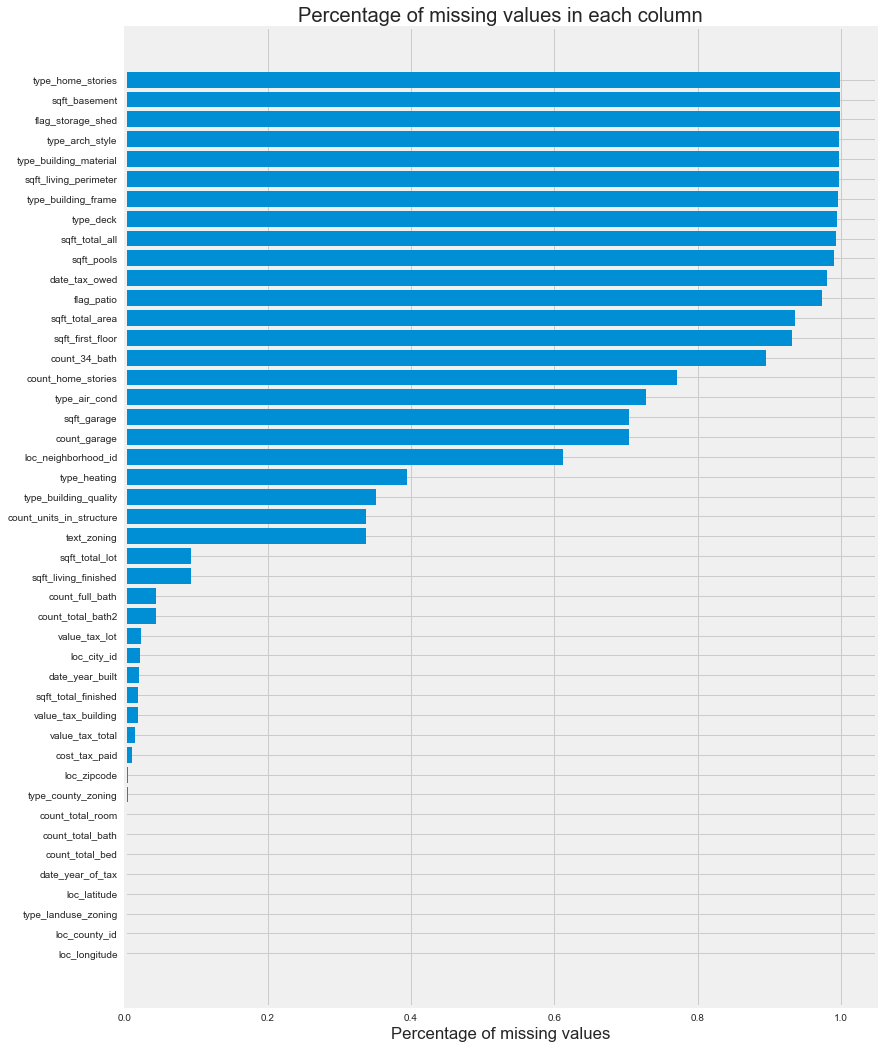

In [46]:
missing_df = prop2016.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df['missing_ratio'] = missing_df['missing_count'] / prop2016.shape[0]
missing_df = missing_df.sort_values(by='missing_count')

ind = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_df.missing_ratio.values)
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Percentage of missing values")
ax.set_title("Percentage of missing values in each column")
plt.show()

-----Prop2016-----
Some features with more than 99.0% NaN values: 

type_home_stories         0.999456
sqft_basement             0.999455
flag_storage_shed         0.999113
type_arch_style           0.997970
type_building_material    0.997740
sqft_living_perimeter     0.997430
type_building_frame       0.995769
type_deck                 0.994273
sqft_total_all            0.992630
sqft_pools                0.990634
dtype: float64
-----Prop2017-----
Some features with more than 99.0% NaN values: 

type_home_stories         0.999456
sqft_basement             0.999455
flag_storage_shed         0.999114
type_arch_style           0.997970
type_building_material    0.997740
sqft_living_perimeter     0.997430
type_building_frame       0.995735
type_deck                 0.994178
sqft_total_all            0.992804
sqft_pools                0.990635
dtype: float64


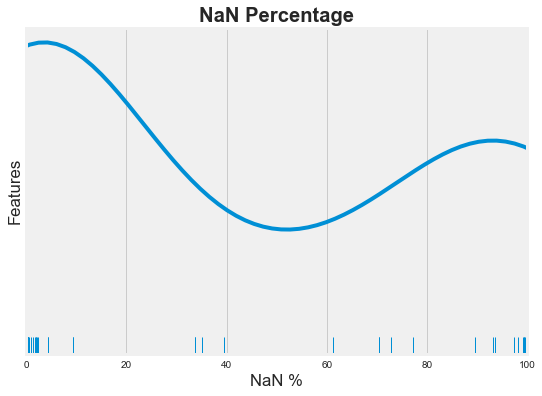

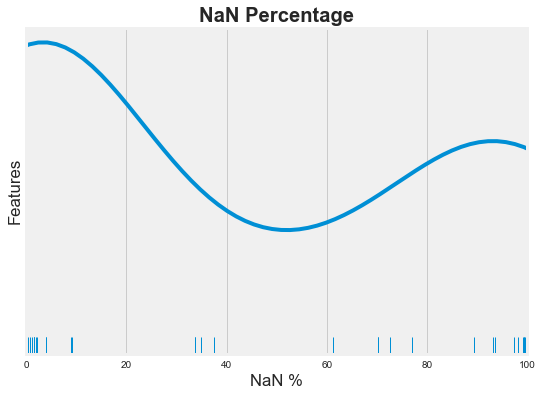

In [47]:
nan_count_2016 = prop2016.isnull().mean()
nan_count_2017 = prop2017.isnull().mean()

threshold = 0.99
print('-----Prop2016-----')
print('Some features with more than {0}% NaN values: \n'.format(threshold * 100))
print(nan_count_2016[nan_count_2016 > threshold].sort_values(ascending=False))

print('-----Prop2017-----')
print('Some features with more than {0}% NaN values: \n'.format(threshold * 100))
print(nan_count_2017[nan_count_2017 > threshold].sort_values(ascending=False))

plot = sns.distplot(nan_count_2016 * 100, hist=False, rug=True)
plot.set(xlim=(0, 100), yticks=[], ylabel='Features', xlabel='NaN %')
sns.plt.title('NaN Percentage', weight='bold')
plt.show()

plot = sns.distplot(nan_count_2017 * 100, hist=False, rug=True)
plot.set(xlim=(0, 100), yticks=[], ylabel='Features', xlabel='NaN %')
sns.plt.title('NaN Percentage', weight='bold')
plt.show()

As the plots and statistics above show, a number of the features are relatively sparse. However, I cannot remove any of the features due to lack of values because they may still be highly correlated with the logerror that I want to predict.

### Combine Data

The prop2016 & train2016 dataframes need to be merged, as do the prop2017 and train2017 dataframes. The train sets contain the logerror values that will be used to train our predictions for the competition.

In [48]:
merged2016 = train2016.merge(prop2016, how='left', on='ParcelId')
merged2017 = train2017.merge(prop2017, how='left', on='ParcelId')

In [49]:
merged2016.head()

,ParcelId,logerror,transactiondate,type_air_cond,type_arch_style,sqft_basement,count_total_bath,count_total_bed,type_building_frame,type_building_quality,count_total_bath2,type_deck,sqft_first_floor,sqft_total_finished,sqft_living_finished,sqft_living_perimeter,sqft_total_area,sqft_total_all,count_fireplace,count_full_bath,count_garage,sqft_garage,flag_hot_tub_spa,type_heating,loc_latitude,loc_longitude,sqft_total_lot,sqft_pools,flag_pool,type_county_zoning,type_landuse_zoning,text_zoning,loc_city_id,loc_county_id,loc_neighborhood_id,loc_zipcode,count_total_room,type_home_stories,count_34_bath,type_building_material,count_units_in_structure,flag_patio,flag_storage_shed,date_year_built,count_home_stories,value_tax_building,value_tax_total,date_year_of_tax,value_tax_lot,cost_tax_paid,date_tax_owed
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,2.0,NaN,NaN,1684.0,1684.0,NaN,NaN,NaN,0.0,2.0,NaN,NaN,0.0,2.0,34280990.0,-118488536.0,7528.0,NaN,0.0,0100,261.0,LARS,12447.0,0.0,31817.0,96370.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1959.0,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,NaN,NaN,2263.0,2263.0,NaN,NaN,NaN,0.0,3.0,2.0,468.0,0.0,NaN,33668120.0,-117677556.0,3643.0,NaN,0.0,1,261.0,NaN,32380.0,1.0,NaN,96962.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,2014.0,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,3.0,NaN,NaN,2217.0,2217.0,NaN,NaN,NaN,0.0,3.0,NaN,NaN,0.0,2.0,34136312.0,-118175032.0,11423.0,NaN,0.0,0100,261.0,PSR6,47019.0,0.0,275411.0,96293.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1940.0,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,2.0,NaN,NaN,839.0,839.0,NaN,NaN,NaN,0.0,2.0,NaN,NaN,0.0,2.0,33755800.0,-118309000.0,70859.0,NaN,0.0,010C,266.0,LAR3,12447.0,0.0,54300.0,96222.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1987.0,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,NaN,NaN,2283.0,2283.0,NaN,NaN,NaN,0.0,2.0,2.0,598.0,0.0,NaN,33485643.0,-117700234.0,6000.0,NaN,1.0,122,261.0,NaN,17686.0,1.0,NaN,96961.0,8.0,NaN,1.0,NaN,NaN,NaN,NaN,1981.0,2.0,169574.0,434551.0,2015.0,264977.0,5488.96,NaN


In [50]:
merged2017.head()

,ParcelId,logerror,transactiondate,type_air_cond,type_arch_style,sqft_basement,count_total_bath,count_total_bed,type_building_frame,type_building_quality,count_total_bath2,type_deck,sqft_first_floor,sqft_total_finished,sqft_living_finished,sqft_living_perimeter,sqft_total_area,sqft_total_all,count_fireplace,count_full_bath,count_garage,sqft_garage,flag_hot_tub_spa,type_heating,loc_latitude,loc_longitude,sqft_total_lot,sqft_pools,flag_pool,type_county_zoning,type_landuse_zoning,text_zoning,loc_city_id,loc_county_id,loc_neighborhood_id,loc_zipcode,count_total_room,type_home_stories,count_34_bath,type_building_material,count_units_in_structure,flag_patio,flag_storage_shed,date_year_built,count_home_stories,value_tax_building,value_tax_total,date_year_of_tax,value_tax_lot,cost_tax_paid,date_tax_owed
0,14297519,0.025595,2017-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,NaN,NaN,3100.0,3100.0,NaN,NaN,NaN,0.0,3.0,2.0,633.0,0.0,NaN,33634931.0,-117869207.0,4506.0,NaN,0.0,122,261.0,NaN,53571.0,1.0,NaN,96978.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,1998.0,NaN,485713.0,1023282.0,2016.0,537569.0,11013.72,NaN
1,17052889,0.055619,2017-01-01,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,1465.0,1465.0,1465.0,NaN,NaN,NaN,1.0,1.0,1.0,0.0,0.0,NaN,34449266.0,-119281531.0,12647.0,NaN,0.0,1110,261.0,NaN,13091.0,2.0,NaN,97099.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,1967.0,1.0,88000.0,464000.0,2016.0,376000.0,5672.48,NaN
2,14186244,0.005383,2017-01-01,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,NaN,1243.0,1243.0,NaN,NaN,NaN,0.0,2.0,2.0,440.0,0.0,NaN,33886168.0,-117823170.0,8432.0,NaN,1.0,122,261.0,NaN,21412.0,1.0,NaN,97078.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,1962.0,1.0,85289.0,564778.0,2016.0,479489.0,6488.30,NaN
3,12177905,-0.103410,2017-01-01,NaN,NaN,NaN,3.0,4.0,NaN,8.0,3.0,NaN,NaN,2376.0,2376.0,NaN,NaN,NaN,0.0,3.0,NaN,NaN,0.0,2.0,34245180.0,-118240722.0,13038.0,NaN,1.0,0101,261.0,LCR110000*,396551.0,0.0,NaN,96330.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1970.0,NaN,108918.0,145143.0,2016.0,36225.0,1777.51,NaN
4,10887214,0.006940,2017-01-01,1.0,NaN,NaN,3.0,3.0,NaN,8.0,3.0,NaN,NaN,1312.0,1312.0,NaN,NaN,NaN,0.0,3.0,NaN,NaN,0.0,2.0,34185120.0,-118414640.0,278581.0,NaN,1.0,010C,266.0,LAR3,12447.0,0.0,268548.0,96451.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1964.0,NaN,73681.0,119407.0,2016.0,45726.0,1533.89,NaN


### Time Variables

This is also a good time to create a month variable from the transaction date to view how the data changes over time.

In [51]:
# Create a month variable from the transactiondate field
merged2016['transaction_month'] = merged2016['transactiondate'].dt.month
merged2017['transaction_month'] = merged2017['transactiondate'].dt.month

## Visualizing the Data

### Sales Over Time

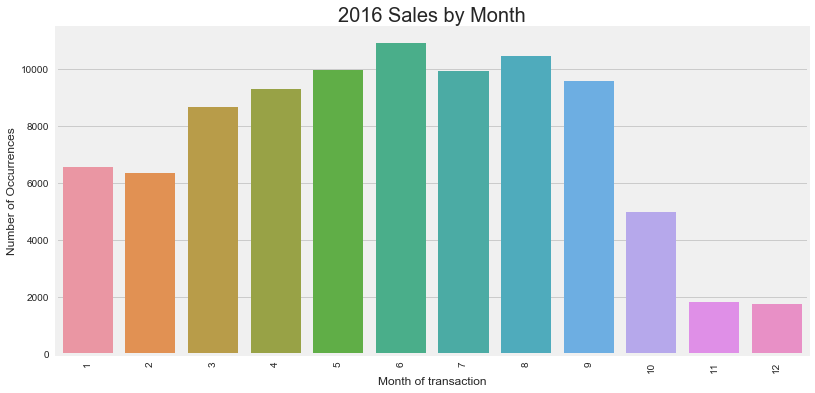

In [52]:
sales2016 = merged2016.transaction_month.value_counts()
plt.figure(figsize=(12,6))
sns.barplot(sales2016.index, sales2016.values)
plt.xticks(rotation='vertical')
plt.xlabel('Month of transaction', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.title('2016 Sales by Month', fontsize=20)
plt.show()

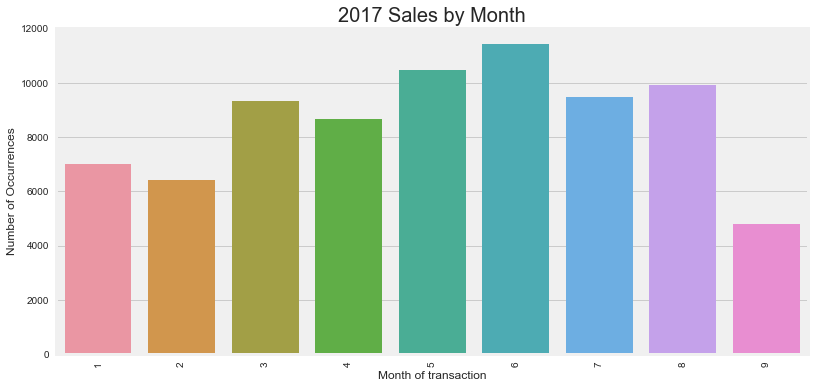

In [53]:
sales2017 = merged2017.transaction_month.value_counts()
plt.figure(figsize=(12,6))
sns.barplot(sales2017.index, sales2017.values)
plt.xticks(rotation='vertical')
plt.xlabel('Month of transaction', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.title('2017 Sales by Month', fontsize=20)
plt.show()

### Viewing the Logerror

The variable that I want to predict is 'logerror' so I am going to look into the values found in the training data.

In [54]:
merged2016.logerror.describe()

count    90275.000000
mean         0.011457
std          0.161079
min         -4.605000
25%         -0.025300
50%          0.006000
75%          0.039200
max          4.737000
Name: logerror, dtype: float64

In [55]:
merged2017.logerror.describe()

count    77613.000000
mean         0.016755
std          0.170887
min         -4.655420
25%         -0.024325
50%          0.006670
75%          0.039295
max          5.262999
Name: logerror, dtype: float64

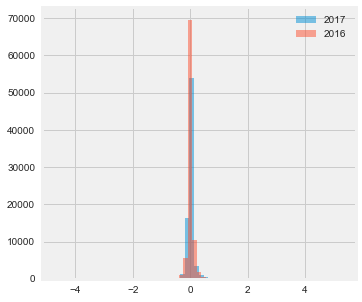

In [56]:
# Histogram of the logerror
x = merged2017['logerror']
y = merged2016['logerror']


plt.figure(figsize=(5,5))
plt.hist(x, bins=60, alpha=0.5, label='2017')
plt.hist(y, bins=60, alpha=0.5, label='2016')
plt.legend(loc='upper right')
plt.show()

/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


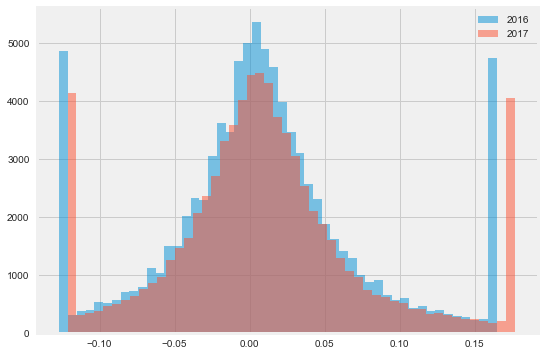

In [57]:
# copy the dataframe to prevent altering our main dataset
copy2016 = merged2016.copy()
copy2017 = merged2017.copy()

# Set bounds at two standard deviations
ulimit7 = np.percentile(copy2017.logerror.values, 95)
llimit7 = np.percentile(copy2017.logerror.values, 5)
ulimit6 = np.percentile(copy2016.logerror.values, 95)
llimit6 = np.percentile(copy2016.logerror.values, 5)

# Remove outliers using bounds above
copy2017['logerror'].loc[copy2017['logerror']>ulimit7] = ulimit7
copy2017['logerror'].loc[copy2017['logerror']<llimit7] = llimit7
copy2016['logerror'].loc[copy2016['logerror']>ulimit6] = ulimit6
copy2016['logerror'].loc[copy2016['logerror']<llimit6] = llimit6

# Plot result
x = copy2017['logerror']
y = copy2016['logerror']
plt.hist(y, bins=50, alpha=0.5, label='2016')
plt.hist(x, bins=50, alpha=0.5, label='2017')
plt.legend(loc='upper right')
plt.show()

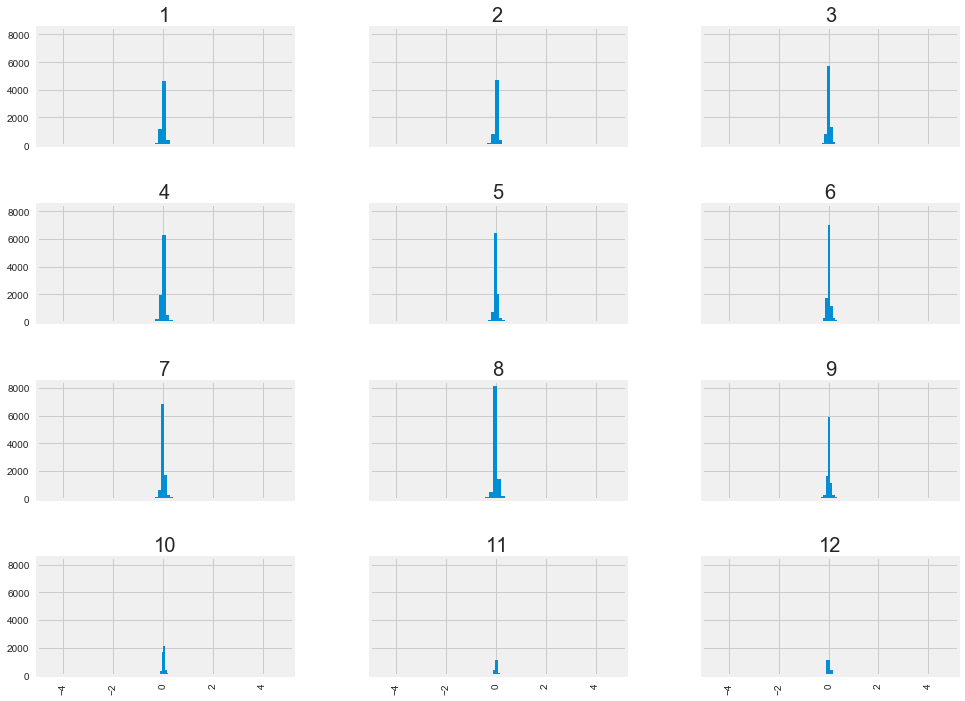

In [58]:
# Plot change in logerror over the months of 2016
merged2016.hist(column='logerror', by='transaction_month', sharex=True, sharey=True, bins=50, figsize=(16, 12));

### Geographic Variables

Before making any plots with the longitude and latitude, I need to convert these values to their typical measurements by dividing each by 1000000.

In [59]:
merged2016.loc_latitude = merged2016.loc_latitude / 1000000
merged2016.loc_longitude = merged2016.loc_longitude / 1000000
merged2017.loc_latitude = merged2017.loc_latitude / 1000000
merged2017.loc_longitude = merged2017.loc_longitude / 1000000

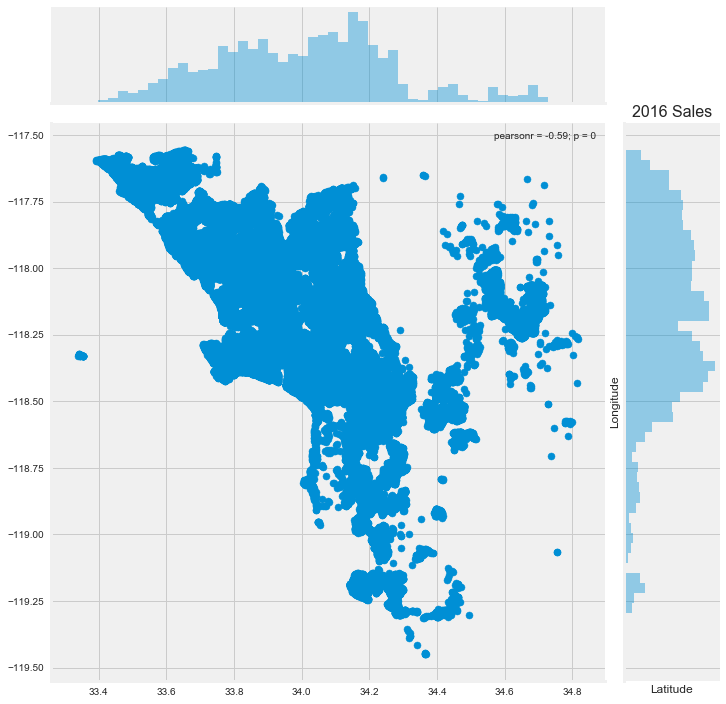

In [60]:
plt.figure(figsize=(12,12))
sns.jointplot(x=merged2016.loc_latitude.values, y=merged2016.loc_longitude.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.title('2016 Sales', fontsize=16)
plt.show()

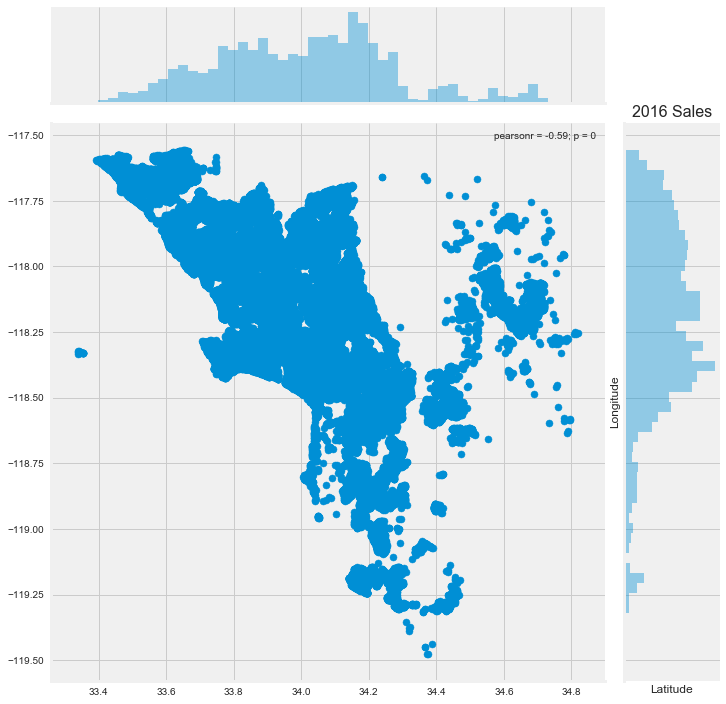

In [61]:
plt.figure(figsize=(12,12))
sns.jointplot(x=merged2017.loc_latitude.values, y=merged2017.loc_longitude.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.title('2016 Sales', fontsize=16)
plt.show()

Sales made across three regions in California. I then looked for any pattern by regions.

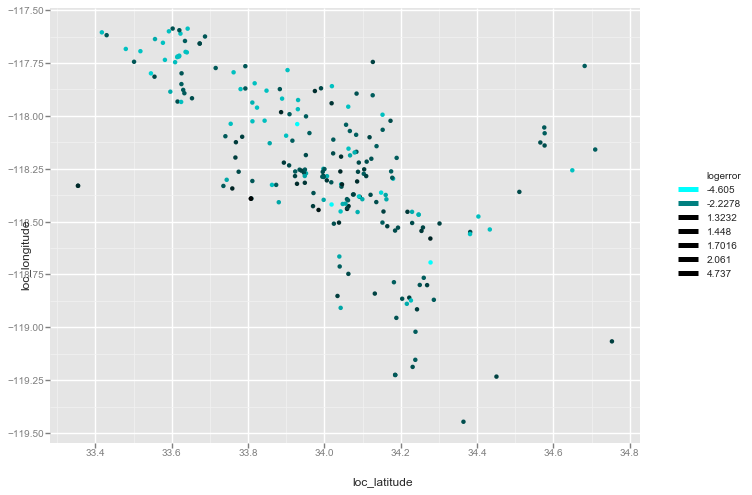

<ggplot: (298572501)>

In [62]:
# Filter out all logerror values < 8 std
filtered_pred2016 = merged2016[abs(merged2016.logerror.values) > 8*np.std(merged2016.logerror.values)]

# Create an array of all latitude & longitudes where logerror > 8 std
lat_long2016 = np.transpose(np.array([filtered_pred2016.loc_latitude, filtered_pred2016.loc_longitude]))
lat2016 = np.array([filtered_pred2016.loc_latitude])
long2016 = np.array([filtered_pred2016.loc_longitude])

# Plot array
ggplot(aes(x='loc_latitude', y='loc_longitude', color='logerror'), data= filtered_pred2016) + \
    geom_point() + \
    scale_color_gradient(low = 'aqua', high = 'black')

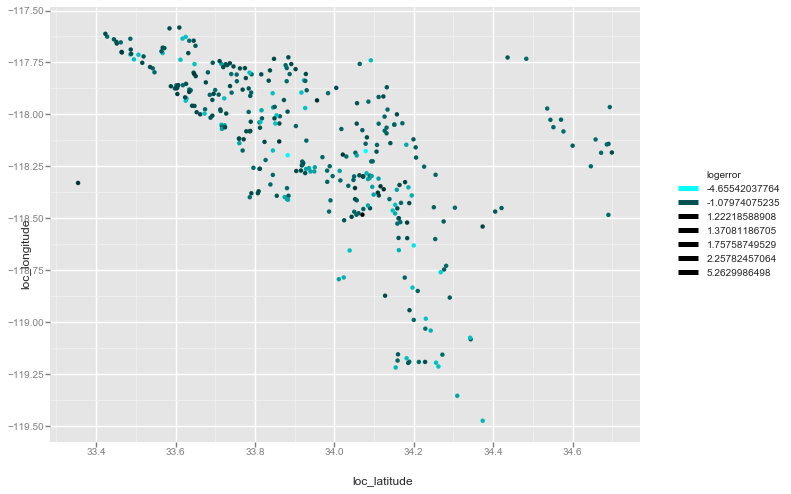

<ggplot: (293592965)>

In [63]:
# Filter out all logerror values < 6 std
filtered_pred2017 = merged2017[abs(merged2017.logerror.values) > 6*np.std(merged2017.logerror.values)]

# Create an array of all latitude & longitudes where logerror > 6 std
lat_long2017 = np.transpose(np.array([filtered_pred2017.loc_latitude, filtered_pred2017.loc_longitude]))
lat2017 = np.array([filtered_pred2017.loc_latitude])
long2017 = np.array([filtered_pred2017.loc_longitude])

# Plot array
ggplot(aes(x='loc_latitude', y='loc_longitude', color='logerror'), data= filtered_pred2017) + \
    geom_point() + \
    scale_color_gradient(low = 'aqua', high = 'black')

Let's look at the house sales on an interactive map. Hat-tip to [Folium How-To](https://www.kaggle.com/daveianhickey/how-to-folium-for-maps-heatmaps-time-analysis/notebook)

In [64]:
color = sns.color_palette()
import folium

# Take average for folium map
avg_lat2016 = sum(merged2016.loc_latitude.values)/len(merged2016.loc_latitude.values)
avg_long2016 = sum(merged2016.loc_longitude.values)/len(merged2016.loc_longitude.values)

# Remove any NaN values from filtered_pred2017
fp2017 = filtered_pred2017[(filtered_pred2017.loc_latitude.notnull()) & (filtered_pred2017.loc_longitude.notnull())]

# Plot folium map
map_16 = folium.Map(location=[avg_lat2016, avg_long2016], zoom_start = 8)

for i in range(0, len(filtered_pred2016)):
    folium.CircleMarker([filtered_pred2016.loc_latitude.iloc[i], filtered_pred2016.loc_longitude.iloc[i]],
                        radius=5,
                        color='#3186cc',
                        fill_color='#3186cc',).add_to(map_16)

for i in range(0, len(fp2017)):
    folium.CircleMarker([fp2017.loc_latitude.iloc[i], fp2017.loc_longitude.iloc[i]],
                        radius=5,
                        color='#ff0000',
                        fill_color='#ff0000',).add_to(map_16)
map_16

##### Geospatial Clustering

I am using [pairwise_distances](https://stackoverflow.com/questions/36816084/clustering-longitude-and-latitude-gps-data) to calculate the Geo distance from latitude / longitude.


In [65]:
# Cluster by coordinates
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.cluster import DBSCAN
from geopy.distance import vincenty

dbscan = DBSCAN(eps=5/6371., min_samples=5, algorithm='ball_tree', metric='haversine') # 50 meters
dbscan.fit(np.radians(lat_long2016))

cluster_labels = dbscan.labels_
num_clusters = len(set(cluster_labels))
clusters = pd.Series([lat_long2016[cluster_labels == n] for n in range(num_clusters)])
print('Number of clusters: {}'.format(num_clusters))

Number of clusters: 7


When filtering the dataset to include only homes were the logerror was greater than 2 std, I found seven logical clusters with DBSCAN. With more time, I could have used these clusters as a new feature in my final model.

## Filling NaN Values

The section below makes a number of assumptions without a ton of logic behind them. This is far from best-practices for a data science project, but I have been limited by the time I had with all of the available data and the due-date of this project. I knew going into this work that I would have to take a shortcut or two somewhere, and this is one of those locations.

In [66]:
# Using the information from the data dictionary, I know that there is already a value for none in type_air_cond
merged2016['type_air_cond'].fillna(5)
merged2017['type_air_cond'].fillna(5)

# Using the data dictionary, I've decided to create another value for type_arch_style: 19 = Other
merged2016['type_arch_style'].fillna(19)
merged2017['type_arch_style'].fillna(19)

# Basement square footage can be filled with 0
merged2016['sqft_basement'].fillna(0)
merged2017['sqft_basement'].fillna(0)
merged2016['count_garage'].fillna(0)
merged2017['count_garage'].fillna(0)
merged2016['sqft_garage'].fillna(0)
merged2017['sqft_garage'].fillna(0)
merged2016['flag_hot_tub_spa'].fillna(0)
merged2017['flag_hot_tub_spa'].fillna(0)
merged2016['loc_zipcode'].fillna(0)
merged2017['loc_zipcode'].fillna(0)
merged2016['loc_neighborhood_id'].fillna(0)
merged2017['loc_neighborhood_id'].fillna(0)
merged2016['loc_city_id'].fillna(0)
merged2017['loc_city_id'].fillna(0)
merged2016['loc_county_id'].fillna(0)
merged2017['loc_county_id'].fillna(0)
merged2016['type_building_material'].fillna(0)
merged2017['type_building_material'].fillna(0)

### Taxes Past Due
# Fill all NaN in date_tax_owed with 2016
merged2016['date_tax_owed'].fillna(2016)
merged2017['date_tax_owed'].fillna(2016)
# Create new column for years taxes are behind ('taxes_pastdue_years') by subtracting 2016 from date_tax_owed
merged2016['taxes_pastdue_years'] = 2016 - merged2016['date_tax_owed']
merged2017['taxes_pastdue_years'] = 2016 - merged2016['date_tax_owed']
# Remove date_tax_owed
merged2016 = merged2016.drop(['date_tax_owed'], axis=1)
merged2017 = merged2017.drop(['date_tax_owed'], axis=1)

# Using the information from the data dictionary, I know that there is already a value for none in type_air_cond
merged2016['type_heating'].fillna(13)
merged2017['type_heating'].fillna(13)

# Assume count_stories is 1
merged2016['count_home_stories'].fillna(13)
merged2017['count_home_stories'].fillna(13)

# Bathroom counts, bedroom counts and many sqft measures are being set to the median value
merged2016['count_total_bath'].fillna(merged2016['count_total_bath'].median())
merged2017['count_total_bath'].fillna(merged2017['count_total_bath'].median())
merged2016['count_total_bed'].fillna(merged2016['count_total_bed'].median())
merged2017['count_total_bed'].fillna(merged2017['count_total_bed'].median())
merged2016['count_total_bath2'].fillna(merged2016['count_total_bath2'].median())
merged2017['count_total_bath2'].fillna(merged2017['count_total_bath2'].median())
merged2016['count_total_bath2'].fillna(merged2016['count_total_bath2'].median())
merged2017['count_total_bath2'].fillna(merged2017['count_total_bath2'].median())
merged2016['type_building_quality'].fillna(merged2016['type_building_quality'].median())
merged2017['type_building_quality'].fillna(merged2017['type_building_quality'].median())
merged2016['sqft_first_floor'].fillna(merged2016['sqft_first_floor'].median())
merged2017['sqft_first_floor'].fillna(merged2017['sqft_first_floor'].median())
merged2016['sqft_total_area'].fillna(merged2016['sqft_total_area'].median())
merged2017['sqft_total_area'].fillna(merged2017['sqft_total_area'].median())
merged2016['count_full_bath'].fillna(merged2016['count_full_bath'].median())
merged2017['count_full_bath'].fillna(merged2017['count_full_bath'].median())

def garagecarcnt(df, lo_pct=0, up_pct=1, lo_cap=None, up_cap=None):
    return fill_median_and_clip_helper(df, 'count_garage', lo_pct, up_pct, lo_cap, up_cap)

# If no sqft_total_finished, use sq_total_first_floor
merged2016.sqft_total_finished.combine_first(prop2016.sqft_first_floor)
merged2017.sqft_total_finished.combine_first(prop2017.sqft_first_floor)

# If no sqft_total_all, use sqft_total_finished
merged2016.sqft_total_all.combine_first(prop2016.sqft_total_finished)
merged2017.sqft_total_all.combine_first(prop2017.sqft_total_finished)

# Keep NaN in sqft_living_perimeter and sqft_total_lot for now
# Very little information or values for count_3/4_bath so drop for now
merged2016 = merged2016.drop(['count_34_bath', 'count_total_room'], axis=1)
merged2017 = merged2017.drop(['count_34_bath', 'count_total_room'], axis=1)

# Creating a category for the following variables: 0 = Other
merged2016['type_building_frame'].fillna(0)
merged2017['type_building_frame'].fillna(0)
merged2016['type_deck'].fillna(0)
merged2017['type_deck'].fillna(0)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7        0.0
8        0.0
9        0.0
10       0.0
11       0.0
12       0.0
13       0.0
14       0.0
15       0.0
16       0.0
17       0.0
18       0.0
19       0.0
20       0.0
21       0.0
22       0.0
23       0.0
24       0.0
25       0.0
26       0.0
27       0.0
28       0.0
29       0.0
        ... 
77583    0.0
77584    0.0
77585    0.0
77586    0.0
77587    0.0
77588    0.0
77589    0.0
77590    0.0
77591    0.0
77592    0.0
77593    0.0
77594    0.0
77595    0.0
77596    0.0
77597    0.0
77598    0.0
77599    0.0
77600    0.0
77601    0.0
77602    0.0
77603    0.0
77604    0.0
77605    0.0
77606    0.0
77607    0.0
77608    0.0
77609    0.0
77610    0.0
77611    0.0
77612    0.0
Name: type_deck, Length: 77613, dtype: float64

## Correlation Analysis
I used correlation analysis to explore the relationships between features in the datasets and determine which features highly correlated with the predicted values of the logerror.

After plotting a heatmap of both data sets, I found the features in both data sets that were the most correlated to the logerror.

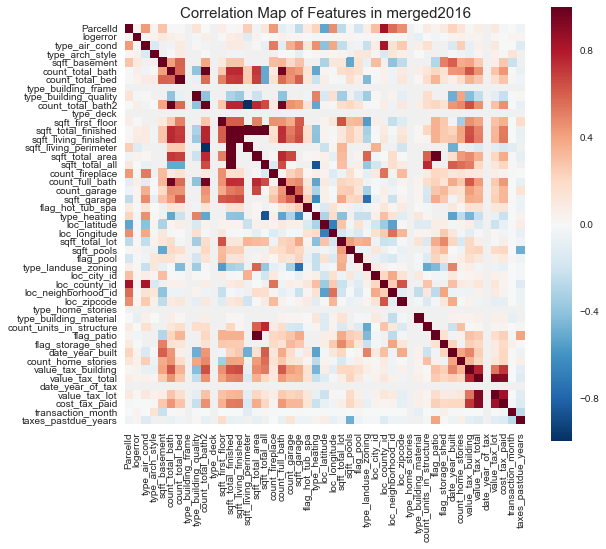

In [67]:
# Define Heat Map of merged2016 data
corr_matrix2016 = merged2016.corr(method='spearman')
f, ax = plt.subplots(figsize=(8, 8))

# Draw heatmap
sns.heatmap(corr_matrix2016, vmax=1., square=True, annot = False)
plt.title("Correlation Map of Features in merged2016", fontsize=15)
plt.show()

In [68]:
# List the Features with the Highest Correlation to the logerror in 2016
print ('Highest Positive Correlation to logerror in 2016:')
print corr_matrix2016.logerror[corr_matrix2016.logerror.values > .04]
print ('--------------')
print ('Highest Negative Correlation to logerror in 2016:')
print corr_matrix2016.logerror[corr_matrix2016.logerror.values < -0.04]

Highest Positive Correlation to logerror in 2016:
logerror                1.000000
type_arch_style         0.044570
sqft_basement           0.098648
count_total_bath        0.066674
count_total_bed         0.041665
count_total_bath2       0.067080
sqft_total_finished     0.074351
sqft_living_finished    0.078631
count_full_bath         0.060977
date_year_built         0.044450
count_home_stories      0.054582
Name: logerror, dtype: float64
--------------
Highest Negative Correlation to logerror in 2016:
sqft_living_perimeter    -0.121528
type_building_material   -0.091949
Name: logerror, dtype: float64


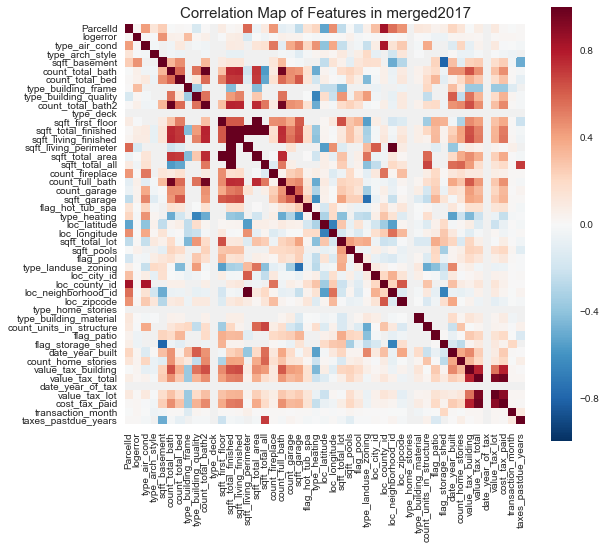

In [69]:
# Define Heat Map of merged2017 data
corr_matrix2017 = merged2017.corr(method='spearman')
f, ax = plt.subplots(figsize=(8, 8))

# Draw heatmap
sns.heatmap(corr_matrix2017, vmax=1., square=True, annot = False)
plt.title("Correlation Map of Features in merged2017", fontsize=15)
plt.show()

In [70]:
# List the Features with the Highest Correlation to the logerror in 2017
print ('Highest Positive Correlation to logerror:')
print corr_matrix2017.logerror[corr_matrix2017.logerror.values > .04]
print ('--------------')
print ('Highest Negative Correlation to logerror:')
print corr_matrix2017.logerror[corr_matrix2017.logerror.values < -0.04]

Highest Positive Correlation to logerror:
logerror                1.000000
sqft_basement           0.446990
count_total_bath        0.060019
count_total_bed         0.049448
type_building_frame     0.309295
count_total_bath2       0.060939
sqft_total_finished     0.072434
sqft_living_finished    0.078133
count_full_bath         0.056728
count_garage            0.043584
sqft_garage             0.044998
sqft_pools              0.053492
Name: logerror, dtype: float64
--------------
Highest Negative Correlation to logerror:
sqft_living_perimeter   -0.157156
sqft_total_all          -0.044161
flag_patio              -0.048832
flag_storage_shed       -0.054981
Name: logerror, dtype: float64


## Final Preprocessing Steps

### Split Data into x & y

In [73]:
# split data into X and y while filling nulls with 0 and dropping a few categorical variables that we may want to add in later
x6 = merged2016.drop(['ParcelId', 'logerror', 'transactiondate', 'transaction_month', 'type_county_zoning', 'text_zoning'], axis=1).fillna(0)
y6 = merged2016['logerror']
x7 = merged2017.drop(['ParcelId', 'logerror', 'transactiondate', 'transaction_month', 'type_county_zoning', 'text_zoning'], axis=1).fillna(0)
y7 = merged2017['logerror']

# convert X to float
X6 = x6.apply(pd.to_numeric)
X7 = x7.apply(pd.to_numeric)